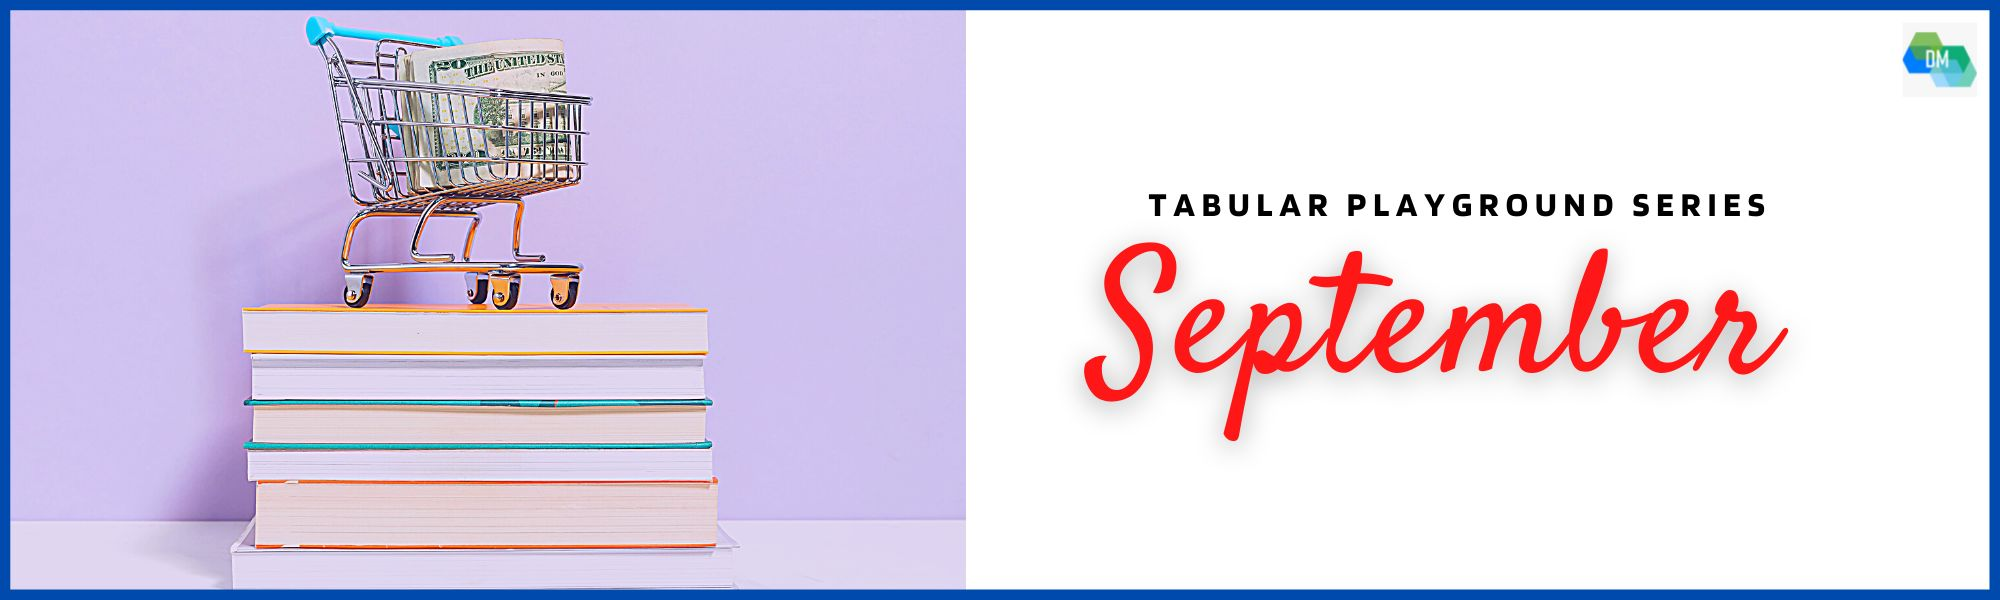

<p style="font-family: Arials; font-size: 18px;text-align: center;; font-style: normal;line-height:1.3">For this challenge, you will be predicting a full year worth of sales for 4 items from two competing stores located in six different countries. This dataset is completely fictional, but contains many effects you see in real-world data, e.g., weekend and holiday effect, seasonality, etc. You are given the challenging task of predicting book sales during the year 2021.</p>

**Observations on this TPS dataset:**
- `num_sold` column is the target variable 
- `Train` dataset has `70,128` rows and `6` columns which contains`4` features, `1` target variable `num_sold` and `1` column of `row_id`
- `Test` dataset has `17,520` rows and `5` columns which contains`4` features with`1` column of `row_id`
- There are `no` missing values in train and test dataset

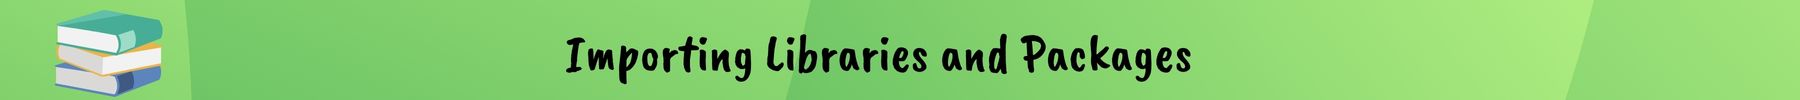

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from scipy.stats import mode
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected = True)
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


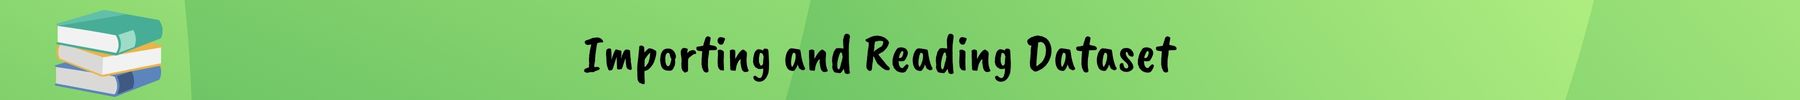

In [2]:
df_train = pd.read_csv("../input/tabular-playground-series-sep-2022/train.csv")
df_test = pd.read_csv("../input/tabular-playground-series-sep-2022/test.csv")
df_subm = pd.read_csv("../input/tabular-playground-series-sep-2022/sample_submission.csv")

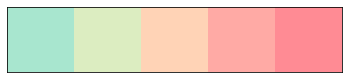

In [3]:
#Custom Color Palette 🎨
custom_colors = ["#a8e6cf","#dcedc1","#ffd3b6","#ffaaa5","#ff8b94"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [4]:
df_train_row_count, df_train_column_count = df_train.shape
print('Total number of rows:', df_train_row_count)
print('Total number of columns:', df_train_column_count)

Total number of rows: 70128
Total number of columns: 6


In [5]:
df_test_row_count, df_test_column_count = df_test.shape
print('Total number of rows:', df_test_row_count)
print('Total number of columns:', df_test_column_count)

Total number of rows: 17520
Total number of columns: 5


In [6]:
df_train.head()

row_id        date  country       store                           product  \
0       0  2017-01-01  Belgium  KaggleMart        Kaggle Advanced Techniques   
1       1  2017-01-01  Belgium  KaggleMart            Kaggle Getting Started   
2       2  2017-01-01  Belgium  KaggleMart                Kaggle Recipe Book   
3       3  2017-01-01  Belgium  KaggleMart  Kaggle for Kids: One Smart Goose   
4       4  2017-01-01  Belgium  KaggleRama        Kaggle Advanced Techniques   

   num_sold  
0       663  
1       615  
2       480  
3       710  
4       240

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    70128 non-null  int64 
 1   date      70128 non-null  object
 2   country   70128 non-null  object
 3   store     70128 non-null  object
 4   product   70128 non-null  object
 5   num_sold  70128 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


In [8]:
feat_float = df_train.select_dtypes(np.float).columns
feat_int = df_train.select_dtypes(np.int).columns
feat_object = df_train.select_dtypes(np.object).columns
print("Float Features:",feat_float)
print("Integer Features:",feat_int)
print("Object Features:",feat_object)

Float Features: Index([], dtype='object')
Integer Features: Index(['row_id', 'num_sold'], dtype='object')
Object Features: Index(['date', 'country', 'store', 'product'], dtype='object')


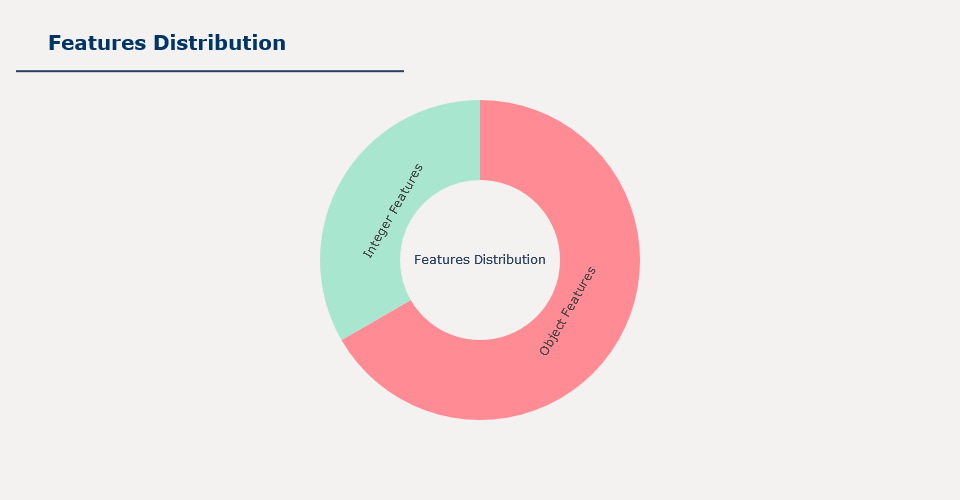

In [9]:
labels=['Integer Features', 'Object Features']
values= [len(feat_int), len(feat_object)]


fig = go.Figure()
fig.add_trace(go.Pie(values = values,labels = labels,hole = 0.5, 
                     hoverinfo ='label+percent'))
fig.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo ='label', 
                  showlegend = False,marker = dict(colors =["#a8e6cf","#ff8b94"]),
                  title = dict(text = 'Features Distribution'))  
fig.update_layout(height = 500, width = 700, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Features Distribution</b>",paper_bgcolor ="#F4F2F0",
                  plot_bgcolor ="#F4F2F0",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.08, y0 = 1.09, x1 = 0.405, y1 = 1.09)])
fig.show()

In [10]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['dayOfMonth'] = df_train['date'].dt.day
df_train['dayOfYear'] = df_train['date'].dt.dayofyear
df_train['weekday'] = df_train['date'].dt.weekday

In [11]:
df_test['date'] = pd.to_datetime(df_test['date'])
df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day
df_test['dayOfMonth'] = df_test['date'].dt.day
df_test['dayOfYear'] = df_test['date'].dt.dayofyear
df_test['weekday'] = df_test['date'].dt.weekday

In [12]:
print('Duration (Train Date): ', df_train['date'].min(), df_train['date'].max())
print('Duration (Test Date): ', df_test['date'].min(), df_test['date'].max())
print('(Train) Days: ',(df_train['date'].max() - df_train['date'].min()))
print('(Test) Days: ',(df_test['date'].max() - df_test['date'].min()))

Duration (Train Date):  2017-01-01 00:00:00 2020-12-31 00:00:00
Duration (Test Date):  2021-01-01 00:00:00 2021-12-31 00:00:00
(Train) Days:  1460 days 00:00:00
(Test) Days:  364 days 00:00:00


In [13]:
df_train.describe().T

count          mean           std     min       25%      50%  \
row_id      70128.0  35063.500000  20244.354176     0.0  17531.75  35063.5   
num_sold    70128.0    194.296986    126.893874    19.0     95.00    148.0   
year        70128.0   2018.501027      1.118348  2017.0   2018.00   2019.0   
month       70128.0      6.522930      3.448728     1.0      4.00      7.0   
day         70128.0     15.729637      8.800155     1.0      8.00     16.0   
dayOfMonth  70128.0     15.729637      8.800155     1.0      8.00     16.0   
dayOfYear   70128.0    183.125257    105.439394     1.0     92.00    183.0   
weekday     70128.0      2.997947      2.000526     0.0      1.00      3.0   

                 75%      max  
row_id      52595.25  70127.0  
num_sold      283.00    986.0  
year         2020.00   2020.0  
month          10.00     12.0  
day            23.00     31.0  
dayOfMonth     23.00     31.0  
dayOfYear     274.00    366.0  
weekday         5.00      6.0

In [14]:
df_train.isna().sum()

row_id        0
date          0
country       0
store         0
product       0
num_sold      0
year          0
month         0
day           0
dayOfMonth    0
dayOfYear     0
weekday       0
dtype: int64

In [15]:
df_test.isna().sum()

row_id        0
date          0
country       0
store         0
product       0
year          0
month         0
day           0
dayOfMonth    0
dayOfYear     0
weekday       0
dtype: int64

In [16]:
print ("Unique values are:\n",df_train.nunique())

Unique values are:
 row_id        70128
date           1461
country           6
store             2
product           4
num_sold        699
year              4
month            12
day              31
dayOfMonth       31
dayOfYear       366
weekday           7
dtype: int64


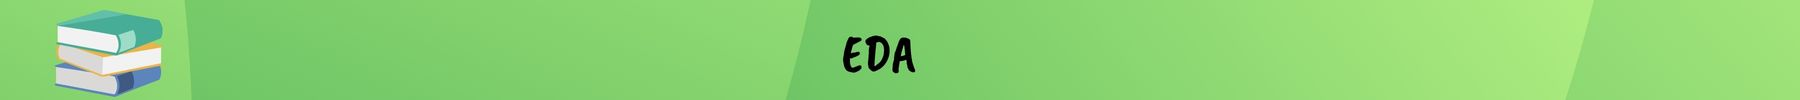

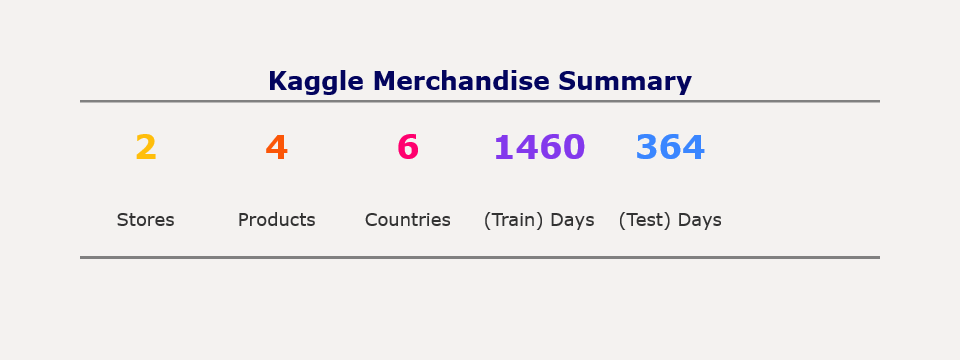

In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(x =[0, 1, 2, 3, 4], y =[1.6, 1.6, 1.6, 1.6, 1.6], mode="text", 
    text=["<span style='font-size:33px;color:#ffbe0b;'><b>2</b></span>", 
          "<span style='font-size:33px;color:#fb5607;'><b>4</b></span>",
          "<span style='font-size:33px;color:#ff006e;'><b>6</b></span>",
          "<span style='font-size:33px;color:#8338ec;'><b>1460</b></span>",
          "<span style='font-size:33px;color:#3a86ff;'><b>364</b></span>"], textposition ="bottom center"))

fig.add_trace(go.Scatter(x=[0, 1, 2, 3, 4],y=[0.7, 0.7, 0.7, 0.7, 0.7], mode="text", 
    text=["Stores", "Products", "Countries", "(Train) Days","(Test) Days"], textposition ="bottom center"))

fig.add_hline(y = 2.2, line_width = 5, line_color ='gray')
fig.add_hline(y = 0.1, line_width = 3, line_color ='gray')
fig.update_yaxes(visible = False)
fig.update_xaxes(visible = False)
fig.update_layout(showlegend = False, height = 300, width = 970, title ='<b>Kaggle Merchandise Summary</b>', 
                  title_x = 0.5, title_y = 0.8, xaxis_range = [-0.5,5.6], yaxis_range = [-0.2,2.2],
                  plot_bgcolor ='#F4F2F0', paper_bgcolor ='#F4F2F0',
                  font = dict(size = 18, color ='#323232'),
                  title_font = dict(size = 25, family ='Verdana',color ='#03045e'))

In [18]:
kr = df_train[df_train.store == 'KaggleRama'].groupby(['date','store']).agg(num_sold =('num_sold','sum')).reset_index()
km = df_train[df_train.store == 'KaggleMart'].groupby(['date','store']).agg(num_sold = ('num_sold','sum')).reset_index()
sold_product = df_train.groupby('product').agg(num_sold =('num_sold','sum')).reset_index().sort_values(by ='num_sold', ascending=False)
sold_country = df_train.groupby('country').agg(num_sold =('num_sold','sum')).reset_index().sort_values(by ='num_sold', ascending=False)

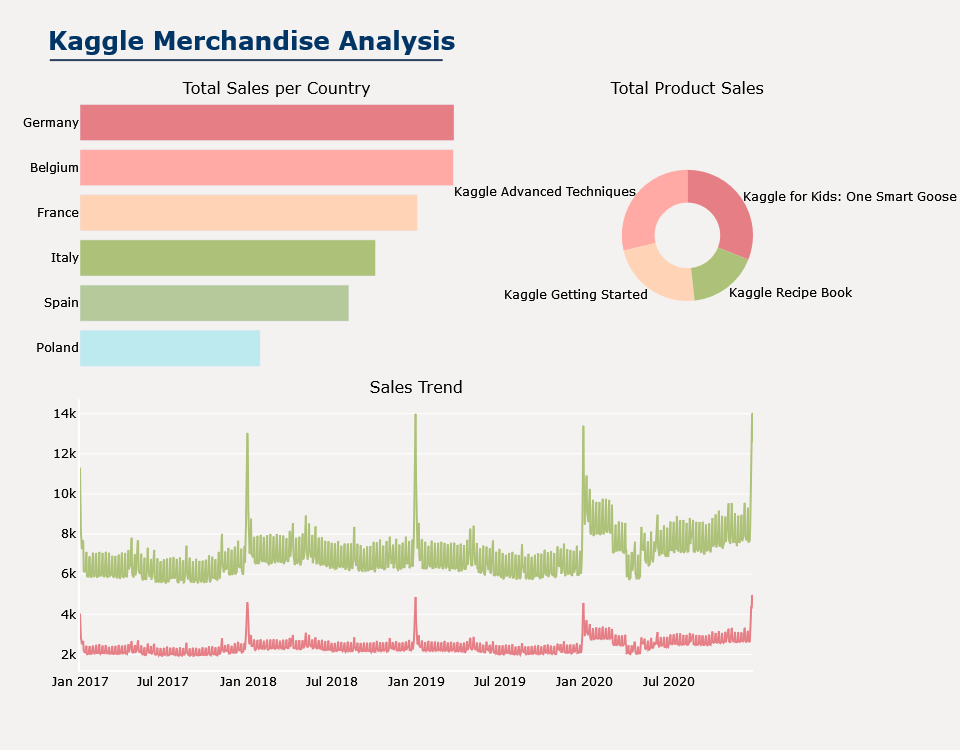

In [19]:
fig = make_subplots(rows = 2, cols = 2, specs =[[{"type": "bar"}, {"type": "pie"}], [{"colspan": 2}, None]],
                    column_widths = [0.75, 0.25], vertical_spacing = 0.05, horizontal_spacing = 0.22,
                    subplot_titles =("Total Sales per Country", "Total Product Sales", "Sales Trend"))

fig.add_trace(go.Bar(x = sold_country['num_sold'], y = sold_country['country'], 
                     marker = dict(color=["#e67e86","#ffaaa5","#ffd3b6","#adc178","#b5c99a","#bdeaee"]),
                     name ='Country', orientation ='h'), row = 1, col = 1)

fig.add_trace(go.Pie(values = sold_product['num_sold'], labels = sold_product['product'], name ='Product',
                     marker = dict(colors=["#e67e86","#ffaaa5","#ffd3b6","#adc178"]), hole = 0.5,
                     hoverinfo ='label+percent+value', textinfo ='label'), row = 1, col = 2)

fig.update_traces(row = 1, col = 2)
fig.add_trace(go.Scatter(x = kr['date'],y = kr.num_sold, mode ='lines', name ='Kaggle Rama',
                         marker = dict(color ="#e67e86")),row = 2, col = 1)
fig.add_trace(go.Scatter(x = km['date'],y = km.num_sold, mode ='lines', name ='Kaggle Mart', 
                         marker = dict(color="#adc178")),row = 2, col = 1)

fig.update_xaxes(showgrid = False, row = 1, col = 1)
fig.update_yaxes(showgrid = False, categoryorder ='total ascending', row = 1, col = 1)

fig.update_yaxes(showgrid = True,categoryorder ='total ascending', linewidth = 2, row = 2, col = 1)
fig.update_xaxes(showgrid = False,categoryorder ='total ascending', linewidth = 2, row = 2, col = 1)

fig.update_xaxes(visible = False, row = 1, col = 1)
fig.update_layout(height = 750, font_color ='#28221D', bargap = 0.2, 
                  title_text ="<b>Kaggle Merchandise Analysis</b>",paper_bgcolor ="#F4F2F0", 
                  plot_bgcolor = "#F4F2F0", title_font = dict(size = 25, family ='Verdana',color ='#003566'),
                  font = dict(color ='black'), hoverlabel = dict(bgcolor ="black"), showlegend = False)

fig.update_layout(legend = dict(orientation ="h", yanchor ="top", y = 1.133, xanchor ="right", x = 1))
fig.update_layout(shapes = [dict(type ="line", xref='paper',yref ='paper',
                                x0 = -0.045, y0 = 1.07, x1 = 0.539, y1 = 1.07)])
fig.show()

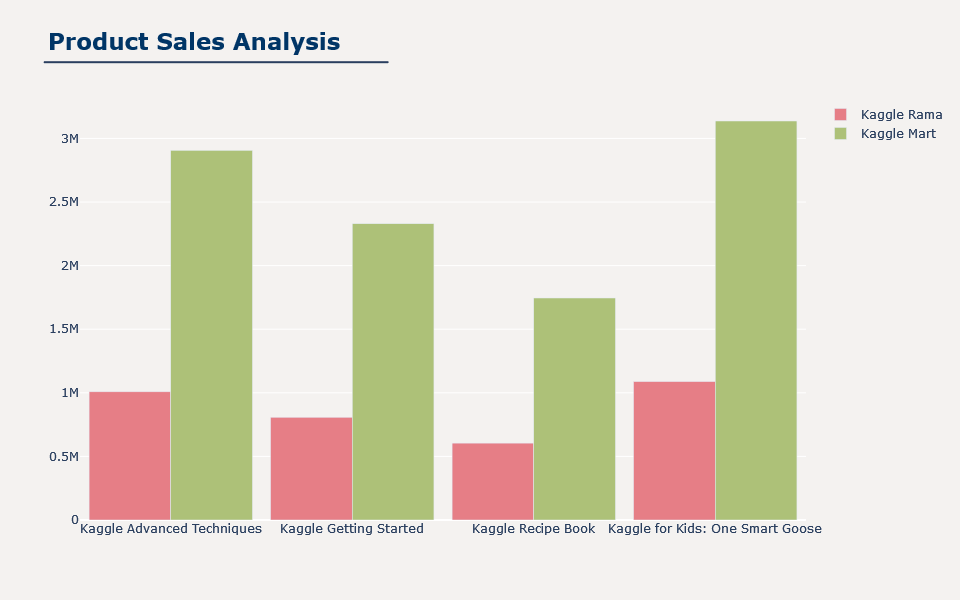

In [20]:
fig = go.Figure()
kr = df_train[df_train.store =='KaggleRama'].groupby(['store','product']).agg(num_sold =('num_sold','sum')).reset_index()
km = df_train[df_train.store =='KaggleMart'].groupby(['store','product']).agg(num_sold =('num_sold','sum')).reset_index()
fig.add_trace(go.Bar(x = kr['product'], y = kr["num_sold"], name ='Kaggle Rama',
    marker = dict(color=["#e67e86","#e67e86","#e67e86","#e67e86"]))) 
fig.add_trace(go.Bar(x = km['product'], y = km["num_sold"], name = 'Kaggle Mart',
    marker = dict(color =["#adc178","#adc178","#adc178","#adc178"])))
fig.update_layout(height = 600, width = 900, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Product Sales Analysis</b>",paper_bgcolor ="#F4F2F0",plot_bgcolor ="#F4F2F0",
                  title_font = dict(size = 23, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.05, y0 = 1.09, x1 = 0.425, y1 = 1.09)])
fig.show()

In [21]:
df_train.country.value_counts()

Belgium    11688
France     11688
Germany    11688
Italy      11688
Poland     11688
Spain      11688
Name: country, dtype: int64

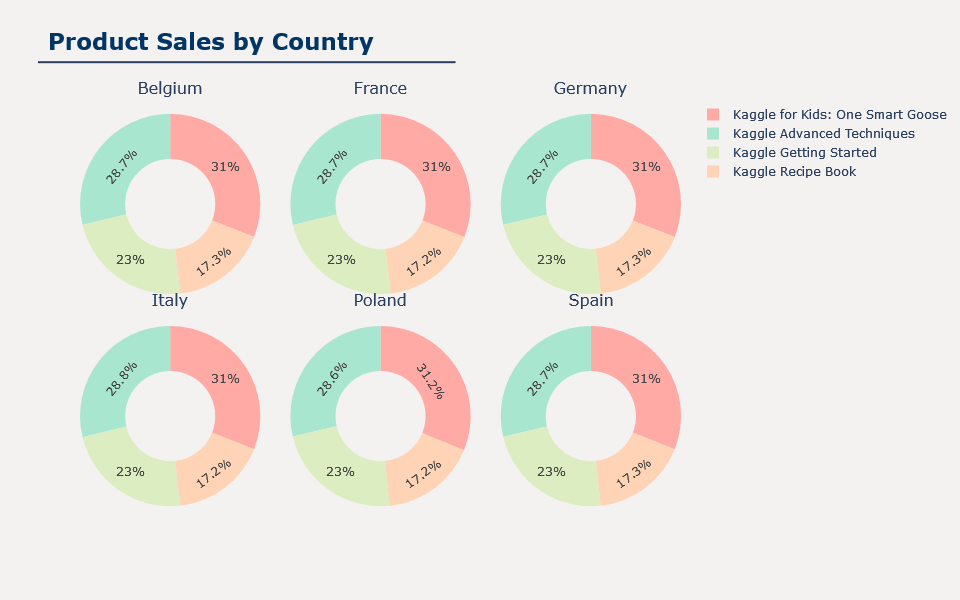

In [22]:
country1 = df_train[df_train['country'] == 'Belgium']
country2 = df_train[df_train['country'] == 'France']
country3 = df_train[df_train['country'] == 'Germany']
country4 = df_train[df_train['country'] == 'Italy']
country5 = df_train[df_train['country'] == 'Poland']
country6 = df_train[df_train['country'] == 'Spain']

fig = make_subplots(rows = 2, cols = 3, specs = [[{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
         [{'type':'domain'},{'type':'domain'},{'type':'domain'}]],  
                    vertical_spacing = 0.01, horizontal_spacing = 0.05,
                    subplot_titles =("Belgium", "France", "Germany", "Italy", "Poland", "Spain"))

fig.add_trace(go.Pie(labels=country1['product'],values=country1['num_sold']), 1,1)
fig.add_trace(go.Pie(labels=country2['product'],values=country2['num_sold']), 1,2)
fig.add_trace(go.Pie(labels=country3['product'],values=country3['num_sold']), 1,3)
fig.add_trace(go.Pie(labels=country4['product'],values=country4['num_sold']), 2,1)
fig.add_trace(go.Pie(labels=country5['product'],values=country5['num_sold']), 2,2)
fig.add_trace(go.Pie(labels=country6['product'],values=country6['num_sold']), 2,3)

fig.update_traces(marker = dict(colors =["#a8e6cf","#dcedc1","#ffd3b6","#ffaaa5"]),hole=0.5)
fig.update_layout(height = 600, width = 900, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Product Sales by Country</b>",paper_bgcolor ="#F4F2F0",
                  plot_bgcolor ="#F4F2F0",
                  title_font = dict(size = 23, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.07, y0 = 1.09, x1 = 0.625, y1 = 1.09)])

fig.show()

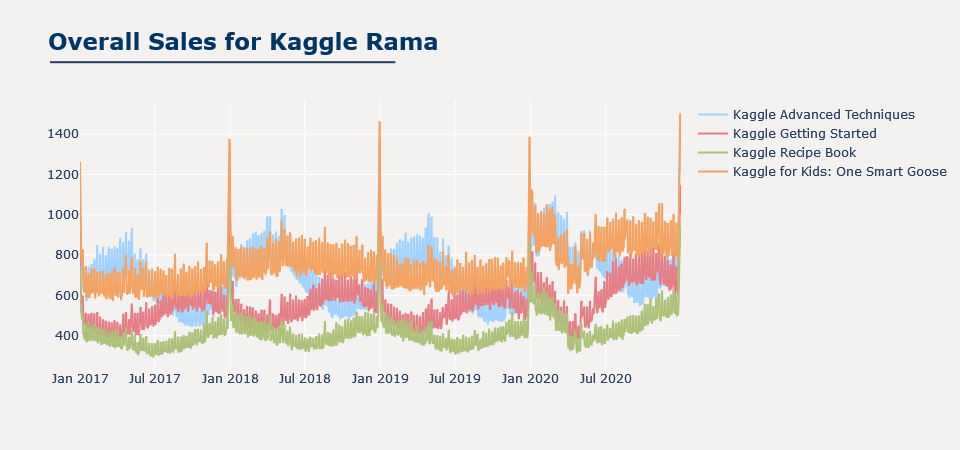

In [23]:
fig = go.Figure()
kr_2 = df_train[df_train.store =='KaggleRama'].groupby(['date','store','product']).agg(num_sold =('num_sold','sum')).reset_index()
kr_bk1 = kr_2[kr_2['product'] == 'Kaggle Advanced Techniques']
kr_bk2 = kr_2[kr_2['product'] == 'Kaggle Getting Started']
kr_bk3 = kr_2[kr_2['product'] == 'Kaggle Recipe Book']
kr_bk4 = kr_2[kr_2['product'] == 'Kaggle for Kids: One Smart Goose']

fig.add_trace(go.Scatter(x = kr_bk1['date'],y = kr_bk1.num_sold, mode='lines', name ='Kaggle Advanced Techniques',
                         marker=dict(color="#a2d2ff")))              
fig.add_trace(go.Scatter(x = kr_bk2['date'],y = kr_bk2.num_sold, mode='lines', name ='Kaggle Getting Started ',
                         marker=dict(color="#e67e86")))              
fig.add_trace(go.Scatter(x = kr_bk3['date'],y = kr_bk3.num_sold, mode='lines', name ='Kaggle Recipe Book',
                         marker=dict(color="#adc178")))  
fig.add_trace(go.Scatter(x = kr_bk4['date'],y = kr_bk4.num_sold, mode='lines', name ='Kaggle for Kids: One Smart Goose',
                         marker=dict(color="#f4a261")))  

fig.update_yaxes(showgrid = True, gridwidth = 0, categoryorder ='total ascending')
fig.update_xaxes(showgrid = True, gridwidth = 0, categoryorder ='total ascending')
fig.update_layout(height = 450, width = 1050, title_text ="<b>Overall Sales for Kaggle Rama</b>",
                  paper_bgcolor ="#F4F2F0",plot_bgcolor = "#F4F2F0", 
                  title_font = dict(size=23,family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line",xref ='paper',yref ='paper',
                                 x0 = -0.05, y0 = 1.14, x1 = 0.525, y1 = 1.14)])
fig.show()

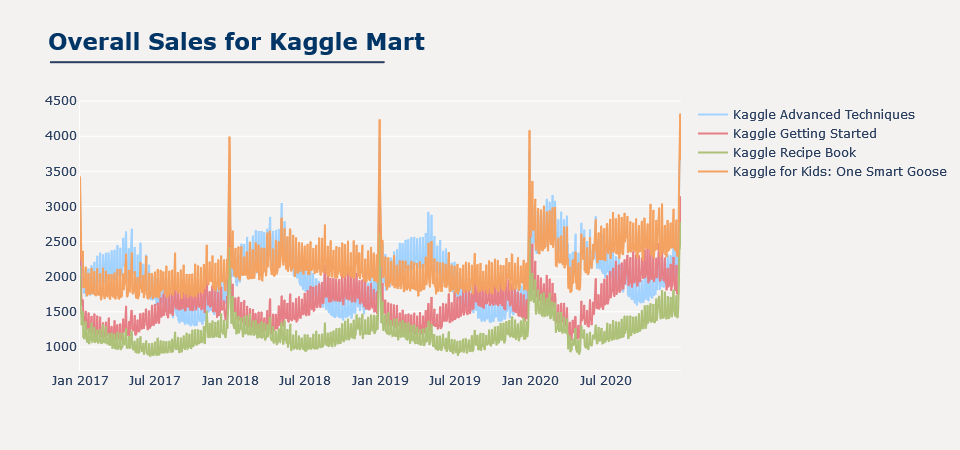

In [24]:
fig = go.Figure()
km_2 = df_train[df_train.store=='KaggleMart'].groupby(['date','store','product']).agg(num_sold =('num_sold','sum')).reset_index()
km_bk1 = km_2[km_2['product'] == 'Kaggle Advanced Techniques']
km_bk2 = km_2[km_2['product'] == 'Kaggle Getting Started']
km_bk3 = km_2[km_2['product'] == 'Kaggle Recipe Book']
km_bk4 = km_2[km_2['product'] == 'Kaggle for Kids: One Smart Goose']

fig.add_trace(go.Scatter(x = km_bk1['date'],y = km_bk1.num_sold, mode ='lines', 
                         name ='Kaggle Advanced Techniques',marker=dict(color="#a2d2ff")))              
fig.add_trace(go.Scatter(x = km_bk2['date'],y = km_bk2.num_sold, mode ='lines',
                         name ='Kaggle Getting Started', marker=dict(color="#e67e86")))              
fig.add_trace(go.Scatter(x = km_bk3['date'],y = km_bk3.num_sold, mode ='lines',
                         name ='Kaggle Recipe Book', marker=dict(color ="#adc178")))              
fig.add_trace(go.Scatter(x = km_bk4['date'],y = km_bk4.num_sold, mode ='lines',
                         name ='Kaggle for Kids: One Smart Goose', marker =dict(color ="#f4a261")))              

fig.update_yaxes(showgrid = True,categoryorder ='total ascending', showline = True)
fig.update_xaxes(showgrid = False,categoryorder ='total ascending', showline = True)
fig.update_layout(height = 450, width = 1050,title_text="<b>Overall Sales for Kaggle Mart</b>",
                  paper_bgcolor ="#F4F2F0",plot_bgcolor = "#F4F2F0", 
                  title_font = dict(size = 23, family ='Verdana',color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line",xref ='paper',yref ='paper',
                                 x0 = -0.05, y0 = 1.14, x1 = 0.507, y1 = 1.14)])
fig.show()

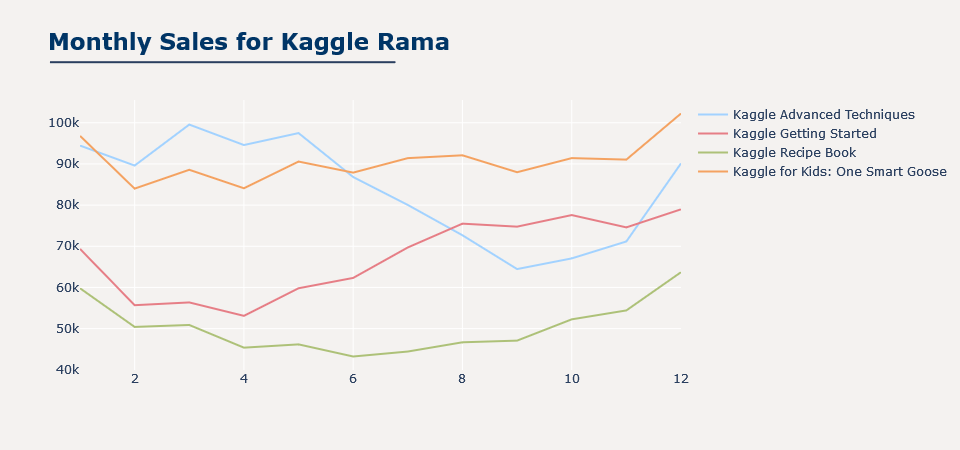

In [25]:
fig = go.Figure()
kr_2 = df_train[df_train.store=='KaggleRama'].groupby(['month','store','product']).agg(num_sold =('num_sold','sum')).reset_index()
kr_bk1 = kr_2[kr_2['product'] == 'Kaggle Advanced Techniques']
kr_bk2 = kr_2[kr_2['product'] == 'Kaggle Getting Started']
kr_bk3 = kr_2[kr_2['product'] == 'Kaggle Recipe Book']
kr_bk4 = kr_2[kr_2['product'] == 'Kaggle for Kids: One Smart Goose']

fig.add_trace(go.Scatter(x = kr_bk1['month'], y = kr_bk1.num_sold, mode ='lines',
                         name='Kaggle Advanced Techniques', marker = dict(color ="#a2d2ff")))              
fig.add_trace(go.Scatter(x = kr_bk2['month'], y = kr_bk2.num_sold, mode ='lines',
                         name='Kaggle Getting Started ', marker = dict(color ="#e67e86")))              
fig.add_trace(go.Scatter(x = kr_bk3['month'], y = kr_bk3.num_sold, mode ='lines',
                         name='Kaggle Recipe Book', marker = dict(color ="#adc178")))  
fig.add_trace(go.Scatter(x = kr_bk4['month'], y = kr_bk4.num_sold, mode ='lines',
                         name='Kaggle for Kids: One Smart Goose', marker=dict(color ="#f4a261")))  

fig.update_yaxes(showgrid = True, gridwidth = 0, categoryorder ='total ascending')
fig.update_xaxes(showgrid = True, gridwidth = 0, categoryorder ='total ascending')
fig.update_layout(height = 450, width = 1050, title_text ="<b>Monthly Sales for Kaggle Rama</b>",
                  paper_bgcolor ="#F4F2F0",plot_bgcolor = "#F4F2F0",
                  title_font =dict(size = 23,family ='Verdana',color='#003566'),
                  hoverlabel = dict(font_size = 13,))
fig.update_layout(shapes=[dict(type ="line",xref ='paper', yref ='paper',
                               x0 = -0.05, y0 = 1.14, x1 = 0.525, y1 = 1.14)])
fig.show()

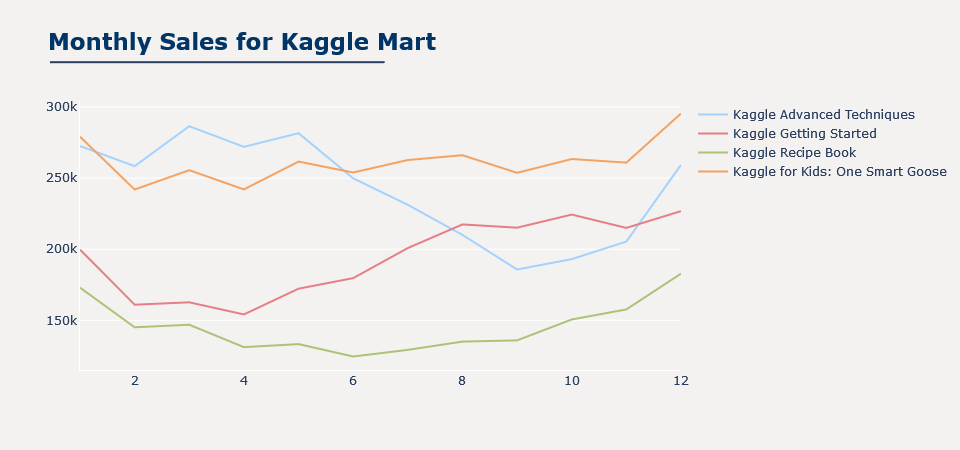

In [26]:
fig = go.Figure()
km_2 = df_train[df_train.store=='KaggleMart'].groupby(['month','store','product']).agg(num_sold =('num_sold','sum')).reset_index()
km_bk1 = km_2[km_2['product'] == 'Kaggle Advanced Techniques']
km_bk2 = km_2[km_2['product'] == 'Kaggle Getting Started']
km_bk3 = km_2[km_2['product'] == 'Kaggle Recipe Book']
km_bk4 = km_2[km_2['product'] == 'Kaggle for Kids: One Smart Goose']

fig.add_trace(go.Scatter(x = km_bk1['month'], y = km_bk1.num_sold, mode ='lines',
                         name='Kaggle Advanced Techniques', marker = dict(color ="#a2d2ff")))              
fig.add_trace(go.Scatter(x = km_bk2['month'], y = km_bk2.num_sold, mode='lines',
                         name='Kaggle Getting Started', marker = dict(color ="#e67e86")))              
fig.add_trace(go.Scatter(x = km_bk3['month'],y = km_bk3.num_sold, mode ='lines',
                         name='Kaggle Recipe Book', marker = dict(color ="#adc178")))              
fig.add_trace(go.Scatter(x = km_bk4['month'], y = km_bk4.num_sold, mode ='lines',
                         name='Kaggle for Kids: One Smart Goose', marker = dict(color ="#f4a261")))              

fig.update_yaxes(showgrid = True,categoryorder='total ascending', showline = True, )
fig.update_xaxes(showgrid = False,categoryorder='total ascending', showline = True)
fig.update_layout(height = 450, width = 1050,title_text="<b>Monthly Sales for Kaggle Mart</b>",
                  paper_bgcolor ="#F4F2F0",plot_bgcolor = "#F4F2F0",
                  title_font = dict(size = 23, family ='Verdana', color='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type="line",xref ='paper', yref ='paper',
                                 x0 = -0.05, y0 = 1.14, x1 = 0.507, y1 = 1.14)])
fig.show()

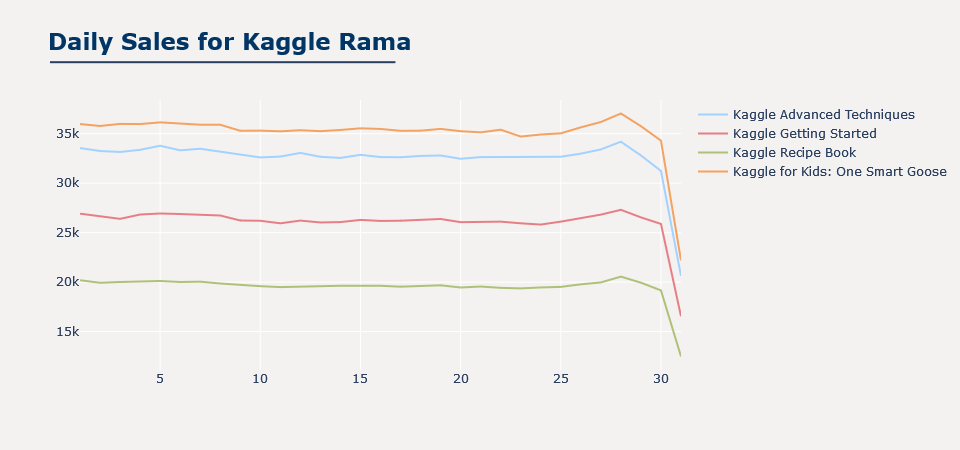

In [27]:
fig = go.Figure()
kr_2 = df_train[df_train.store=='KaggleRama'].groupby(['day','store','product']).agg(num_sold =('num_sold','sum')).reset_index()
kr_bk1 = kr_2[kr_2['product'] == 'Kaggle Advanced Techniques']
kr_bk2 = kr_2[kr_2['product'] == 'Kaggle Getting Started']
kr_bk3 = kr_2[kr_2['product'] == 'Kaggle Recipe Book']
kr_bk4 = kr_2[kr_2['product'] == 'Kaggle for Kids: One Smart Goose']

fig.add_trace(go.Scatter(x = kr_bk1['day'],y = kr_bk1.num_sold, mode ='lines',
                         name ='Kaggle Advanced Techniques', marker=dict(color="#a2d2ff")))              
fig.add_trace(go.Scatter(x = kr_bk2['day'],y = kr_bk2.num_sold, mode ='lines',
                         name ='Kaggle Getting Started ', marker=dict(color="#e67e86")))              
fig.add_trace(go.Scatter(x = kr_bk3['day'],y = kr_bk3.num_sold, mode ='lines',
                         name ='Kaggle Recipe Book', marker=dict(color="#adc178")))  
fig.add_trace(go.Scatter(x = kr_bk4['day'],y = kr_bk4.num_sold, mode ='lines',
                         name ='Kaggle for Kids: One Smart Goose', marker=dict(color="#f4a261")))  

fig.update_yaxes(showgrid = True,gridwidth = 0, categoryorder ='total ascending')
fig.update_xaxes(showgrid = True,gridwidth = 0, categoryorder ='total ascending')
fig.update_layout(height = 450, width = 1050, title_text="<b>Daily Sales for Kaggle Rama</b>",
                  paper_bgcolor ="#F4F2F0", plot_bgcolor = "#F4F2F0",
                  title_font = dict(size = 23,family ='Verdana',color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper',yref ='paper',
                                 x0 = -0.05, y0 = 1.14, x1 = 0.525, y1 = 1.14)])
fig.show()

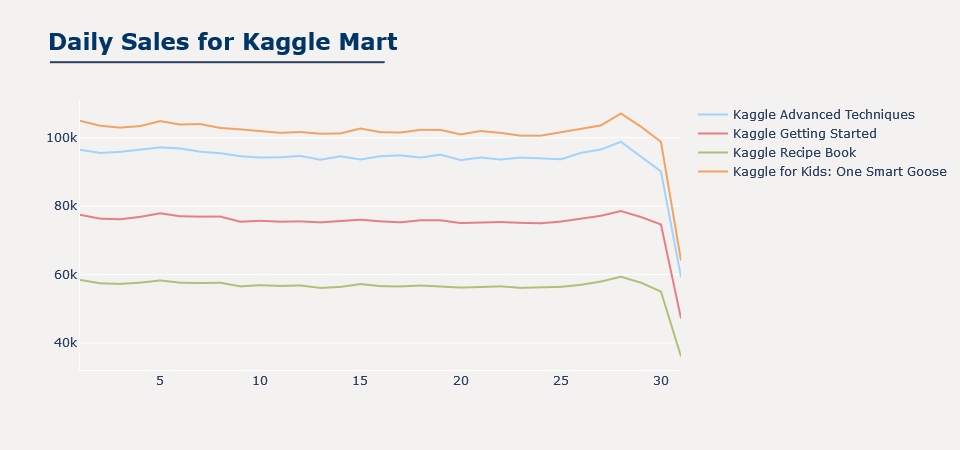

In [28]:
fig = go.Figure()
km_2 = df_train[df_train.store=='KaggleMart'].groupby(['day','store','product']).agg(num_sold =('num_sold','sum')).reset_index()
km_bk1 = km_2[km_2['product'] == 'Kaggle Advanced Techniques']
km_bk2 = km_2[km_2['product'] == 'Kaggle Getting Started']
km_bk3 = km_2[km_2['product'] == 'Kaggle Recipe Book']
km_bk4 = km_2[km_2['product'] == 'Kaggle for Kids: One Smart Goose']

fig.add_trace(go.Scatter(x = km_bk1['day'],y= km_bk1.num_sold, mode ='lines',
                         name ='Kaggle Advanced Techniques', marker = dict(color ="#a2d2ff")))              
fig.add_trace(go.Scatter(x = km_bk2['day'],y = km_bk2.num_sold, mode ='lines',
                         name ='Kaggle Getting Started', marker=dict(color ="#e67e86")))              
fig.add_trace(go.Scatter(x = km_bk3['day'],y =km_bk3.num_sold, mode ='lines',
                         name ='Kaggle Recipe Book', marker = dict(color ="#adc178")))              
fig.add_trace(go.Scatter(x = km_bk4['day'],y = km_bk4.num_sold, mode ='lines',
                         name ='Kaggle for Kids: One Smart Goose', marker = dict(color ="#f4a261")))              

fig.update_yaxes(showgrid = True,categoryorder='total ascending', showline=True, )
fig.update_xaxes(showgrid = False,categoryorder='total ascending', showline=True)
fig.update_layout(height = 450,width=1050,title_text="<b>Daily Sales for Kaggle Mart</b>",
                  paper_bgcolor ="#F4F2F0",plot_bgcolor = "#F4F2F0",
                  title_font = dict(size = 23, family ='Verdana',color ='#003566'),
                  hoverlabel = dict(font_size=13))
fig.update_layout(shapes = [dict(type ="line",xref ='paper',yref ='paper',
                                 x0 = -0.05, y0 = 1.14, x1 = 0.507, y1 = 1.14)])
fig.show()

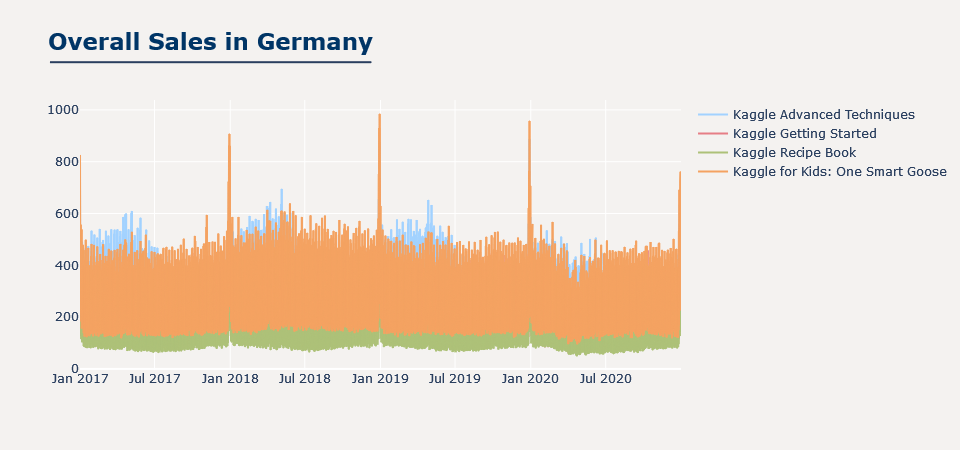

In [29]:
fig = go.Figure()
kr_2 = df_train[df_train.country=='Germany'].groupby(['date','store','product']).agg(num_sold =('num_sold','sum')).reset_index()
kr_bk1 = kr_2[kr_2['product'] == 'Kaggle Advanced Techniques']
kr_bk2 = kr_2[kr_2['product'] == 'Kaggle Getting Started']
kr_bk3 = kr_2[kr_2['product'] == 'Kaggle Recipe Book']
kr_bk4 = kr_2[kr_2['product'] == 'Kaggle for Kids: One Smart Goose']

fig.add_trace(go.Scatter(x = kr_bk1['date'],y = kr_bk1.num_sold,mode ='lines',name ='Kaggle Advanced Techniques',
                         marker = dict(color="#a2d2ff")))              
fig.add_trace(go.Scatter(x = kr_bk2['date'],y = kr_bk2.num_sold,mode ='lines',name ='Kaggle Getting Started ',
                         marker = dict(color="#e67e86")))              
fig.add_trace(go.Scatter(x = kr_bk3['date'],y = kr_bk3.num_sold,mode ='lines',name ='Kaggle Recipe Book',
                         marker = dict(color="#adc178")))  
fig.add_trace(go.Scatter(x = kr_bk4['date'],y = kr_bk4.num_sold,mode ='lines',name ='Kaggle for Kids: One Smart Goose',
                         marker = dict(color="#f4a261")))  

fig.update_yaxes(showgrid = True,gridwidth = 0, categoryorder ='total ascending')
fig.update_xaxes(showgrid = True,gridwidth = 0, categoryorder ='total ascending')
fig.update_layout(height = 450, width = 1050, title_text ="<b>Overall Sales in Germany</b>",
                  paper_bgcolor ="#F4F2F0", plot_bgcolor = "#F4F2F0",
                  title_font = dict(size = 23,family ='Verdana', color='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes=[dict(type ="line",xref ='paper',yref ='paper',
                               x0 = -0.05, y0 = 1.14, x1 = 0.485, y1 = 1.14)])
fig.show()

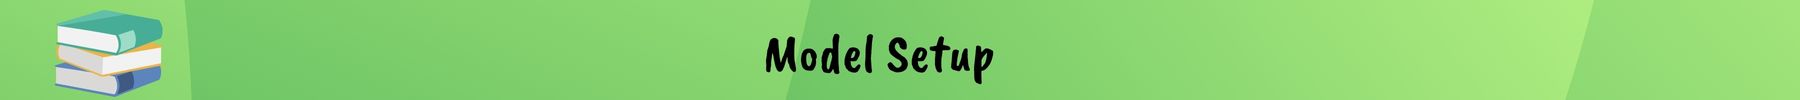

In [30]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
cols = ['country', 'store', 'product']
for col in cols:
    le = LabelEncoder()
    df_train[col] = enc.fit_transform(df_train[col])
    df_test[col] = enc.transform(df_test[col])

In [31]:
def smape(actual, predicted):
    return np.mean(np.abs(predicted - actual) / ((np.abs(predicted) + np.abs(actual))/2))*100

In [32]:
train_features = [col for col in df_train.columns if col not in ['row_id', 'num_sold', 'date']]

In [33]:
# excluding data for the year 2020
# no leap year from 2017-2019
# first day of 2020 will be 365(days)*3(no of years)*6(countries)*4(products)*2(stores)
n = 52560 
train_set = df_train.iloc[0:n]
val_set = df_train.iloc[n:len(df_train)]
X_train = train_set[train_features]
X_test = val_set[train_features]
y_train = train_set['num_sold']
y_test = val_set['num_sold']

In [34]:
# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (52560, 9)
y_train: (52560,)
X_test: (17568, 9)
y_test: (17568,)


In [35]:
import lightgbm as lgbm  
from lightgbm import LGBMRegressor
model =  LGBMRegressor(objective ='regression',learning_rate = 0.05, max_depth = 3, metric ='mae',
                            n_estimators = 500, random_state = 42)
model.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.05, max_depth=3, metric='mae', n_estimators=500,
              objective='regression', random_state=42)

In [36]:
y_pred = model.predict(X_test)
smape(y_test, y_pred)

32.02087088140271

In [37]:
X_train, Xn_test = df_train[train_features], df_test[train_features]
y_train = df_train['num_sold']
model.fit(X_train, y_train)
y_pred = model.predict(Xn_test)

In [38]:
df_subm['num_sold']= y_pred
df_subm=df_subm.round({"num_sold":0})
df_subm

row_id  num_sold
0       70128     487.0
1       70129     358.0
2       70130     309.0
3       70131     491.0
4       70132     182.0
...       ...       ...
17515   87643     598.0
17516   87644     193.0
17517   87645     164.0
17518   87646     134.0
17519   87647     223.0

[17520 rows x 2 columns]

In [39]:
df_subm.to_csv('submission.csv', index=False)

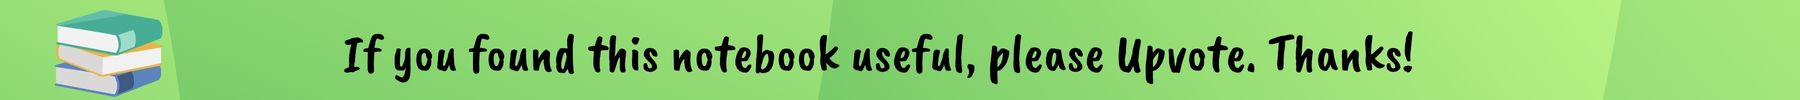